In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('rev data for test.xlsx')

In [3]:
df.head()

,Type,Latitude,Longitude,Report Location
0,Beaver Accident,47.6992,-122.2167,"(47.6291923608656, -122.186728398282)"
1,Beaver Accident,47.6977,-122.2164,"(47.5576821104334, -122.156421437319)"
2,Beaver Accident,47.6967,-122.2131,"(47.6167258135906, -122.173139389518)"
3,Beaver Accident,47.6971,-122.2178,"(47.5370517340417, -122.197755316941)"
4,Beaver Accident,47.6925,-122.2127,"(47.6124577512516, -122.14272010056)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 4 columns):
Type               1514 non-null object
Latitude           1514 non-null float64
Longitude          1514 non-null float64
Report Location    1514 non-null object
dtypes: float64(2), object(2)
memory usage: 47.4+ KB


In [5]:
df.index

RangeIndex(start=0, stop=1514, step=1)

In [6]:
df.values

array([['Beaver Accident', 47.6992, -122.2167,
        '(47.6291923608656, -122.186728398282)'],
       ['Beaver Accident', 47.6977, -122.2164,
        '(47.5576821104334, -122.156421437319)'],
       ['Beaver Accident', 47.6967, -122.2131,
        '(47.6167258135906, -122.173139389518)'],
       ..., 
       ['Seal Attack', 47.6128, -122.3732115,
        '(47.5728901259995, -122.355987096882)'],
       ['Seal Attack', 47.61, -122.3619274,
        '(47.608958904841, -122.388274687981)'],
       ['Seal Attack', 47.6, -122.3504868,
        '(47.6041100663205, -122.377337083509)']], dtype=object)

In [7]:
df.shape

(1514, 4)

In [9]:
df.columns

Index(['Type', 'Latitude', 'Longitude', 'Report Location'], dtype='object')

In [10]:
df.head(3)

,Type,Latitude,Longitude,Report Location
0,Beaver Accident,47.6992,-122.2167,"(47.6291923608656, -122.186728398282)"
1,Beaver Accident,47.6977,-122.2164,"(47.5576821104334, -122.156421437319)"
2,Beaver Accident,47.6967,-122.2131,"(47.6167258135906, -122.173139389518)"


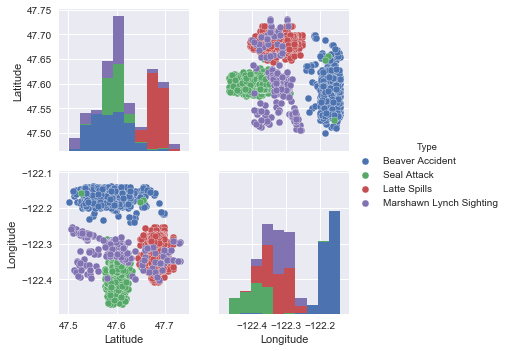

In [11]:
sns.pairplot(df,hue='Type')

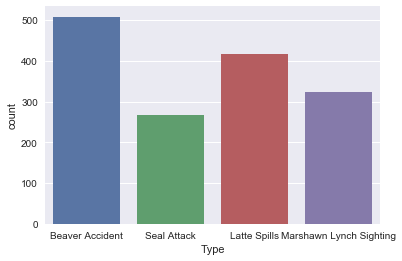

In [15]:
sns.countplot(x='Type',data=df)

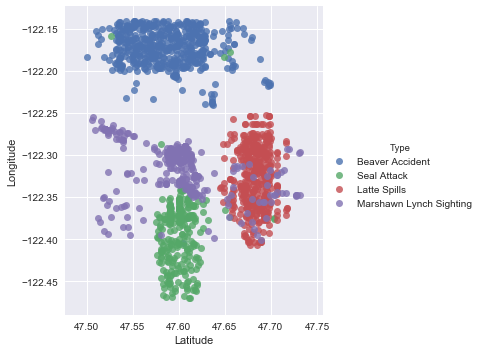

In [19]:
sns.lmplot(x='Latitude',y='Longitude',data=df,hue='Type',fit_reg=False)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [29]:
# scaler.fit(df[['Latitude', 'Longitude']])
# scaled_features = scaler.transform(df[['Latitude', 'Longitude']])

In [32]:
scaled_features = scaler.fit_transform(df[['Latitude', 'Longitude']])

In [33]:
scaled_features

array([[ 1.55533221,  0.7559141 ],
       [ 1.52642979,  0.7592606 ],
       [ 1.50716151,  0.79607208],
       ..., 
       [-0.10944709, -0.98997081],
       [-0.16339827, -0.86409673],
       [-0.35608106, -0.7364769 ]])

In [35]:
df_scaled = pd.DataFrame(scaled_features,columns=('Latitude','Longitude'))

In [36]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(df_scaled,df['Type'],test_size=0.3,random_state=101)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
#elbow method
error_rate = []
for i in range(1,50):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i= KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

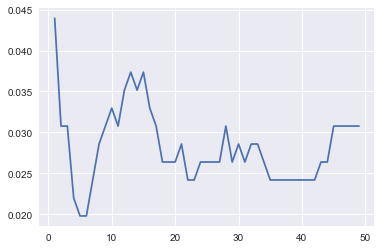

In [79]:
plt.plot(range(1,50),error_rate)
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('SVM',SVC()))
models.append(('Tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [48]:
from sklearn.model_selection import cross_val_score,KFold

In [66]:
results = [] # for boxplot
names = [] # for boxplot
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f" % (name,cv_results.mean())
    print(msg)

LR : 0.923495
SVM : 0.949012
Tree : 0.933908
KNN : 0.956577


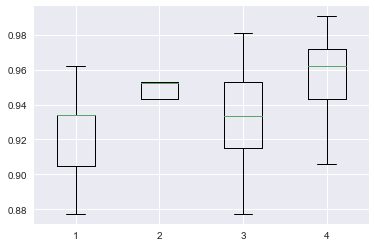

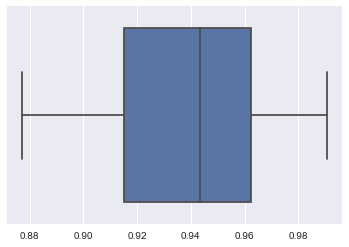

In [55]:
plt.boxplot(results)
plt.show()
sns.boxplot(x=results)

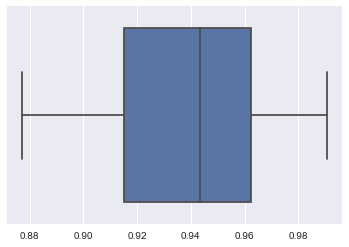

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.boxplot(results)

In [59]:
results

[array([ 0.95283019,  0.93396226,  0.96226415,  0.93396226,  0.87735849,
         0.93396226,  0.89622642,  0.90566038,  0.93396226,  0.9047619 ]),
 array([ 0.97169811,  0.95283019,  0.99056604,  0.94339623,  0.91509434,
         0.95283019,  0.91509434,  0.94339623,  0.95283019,  0.95238095]),
 array([ 0.98113208,  0.9245283 ,  0.95283019,  0.91509434,  0.89622642,
         0.95283019,  0.87735849,  0.91509434,  0.97169811,  0.94285714]),
 array([ 0.97169811,  0.97169811,  0.99056604,  0.94339623,  0.90566038,
         0.96226415,  0.94339623,  0.94339623,  0.96226415,  0.97142857])]

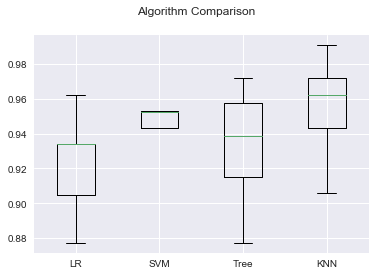

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Algorithm Comparison")

plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()